In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mplcursors

import torch
import numpy as np
from umap import UMAP

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_distances

from pathlib import Path
import os
import sys
from collections import defaultdict

sys.path.insert(0, '../src/models/')
sys.path.insert(0, '../src/features/')

from nvsm_lstm_glove import NVSMLSTM
from utils import load_data, create_query_dataset
from tokenize_documents import tokenize
from test_lstm_glove_model import load_model_and_data

# Model and documents loading

In [2]:
device = torch.device('cuda')

In [3]:
model_folder = Path('../models')
data_folder  = Path('../data/processed')
glove_path   = Path('../glove')

In [4]:
voc, stoi, _, docs = load_data(
    model_folder,
    data_folder
)

In [5]:
_, _, nvsm = load_model_and_data(
    '../models/nvsm_lstm_glove.pt', 
    device, 
    model_folder, 
    data_folder, 
    glove_path
)

Loading glove embedding
50 dimensional embeddings
Fetching pretrained embedding for our vocabulary
41014 / 60002 found (68.35%)


In [6]:
document_embs = nvsm.doc_emb.weight.detach().cpu().numpy()

In [7]:
categories        = [doc['category'] for doc in docs]
categories_enc    = {category : i for i, category in enumerate(list(set(categories)))}
categories_target = np.array([categories_enc[cat] for cat in categories])

In [8]:
doc_names = [doc['name'] for doc in docs]

In [9]:
cat_to_filenames = {}
cat_to_filter    = {}

for cat in categories_enc:
    cat_filter            = categories_target == categories_enc[cat]
    cat_to_filter[cat]    = cat_filter
    cat_to_filenames[cat] = [doc_name for doc_name, cat_mask in zip(doc_names, cat_filter) if cat_mask]

# Visualization using dimensionality reduction methods

In [10]:
alpha = 0.4
figsize = (10, 7)

## Principal Component Analysis (PCA)

<IPython.core.display.Javascript object>


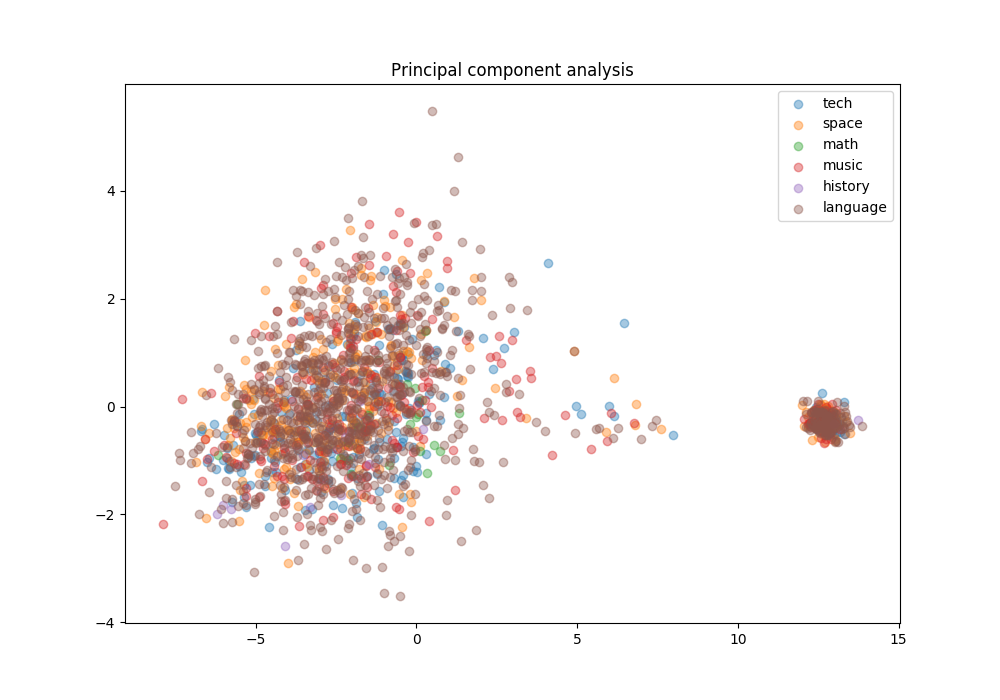

tech      --> 270
space     --> 352
math      --> 23
music     --> 287
history   --> 13
language  --> 900


In [11]:
doc_pca     = PCA(n_components = 2)
doc_emb_pca = doc_pca.fit_transform(document_embs)

plt.figure(figsize = figsize)
plt.title('Principal component analysis')
for cat in categories_enc:
    doc_emb_cat = doc_emb_pca[cat_to_filter[cat]]
    print(f'{cat:9} --> {doc_emb_cat.shape[0]}')
    plt.scatter(doc_emb_cat[:, 0], doc_emb_cat[:, 1], label = cat, alpha = alpha)
_ = plt.legend()

## Euclidean distance T-distributed Stochastic Neighbor Embedding (T-SNE)

<IPython.core.display.Javascript object>


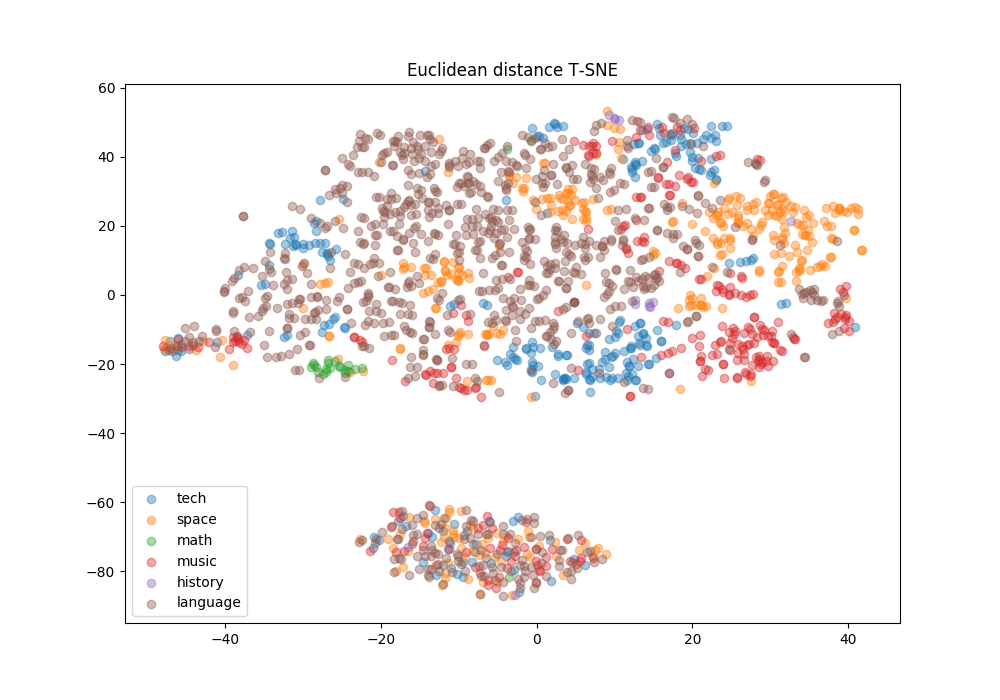

tech      --> 270
space     --> 352
math      --> 23
music     --> 287
history   --> 13
language  --> 900


In [12]:
doc_tsne     = TSNE(n_components = 2)
doc_emb_tsne = doc_tsne.fit_transform(document_embs)

plt.figure(figsize = figsize)
plt.title('Euclidean distance T-SNE')
for cat in categories_enc:
    doc_emb_cat = doc_emb_tsne[cat_to_filter[cat]]
    print(f'{cat:9} --> {doc_emb_cat.shape[0]}')
    plt.scatter(doc_emb_cat[:, 0], doc_emb_cat[:, 1], label = cat, alpha = alpha)
_ = plt.legend()

## Cosine distance T-Distributed Stochastic Neighbor Embedding

<IPython.core.display.Javascript object>


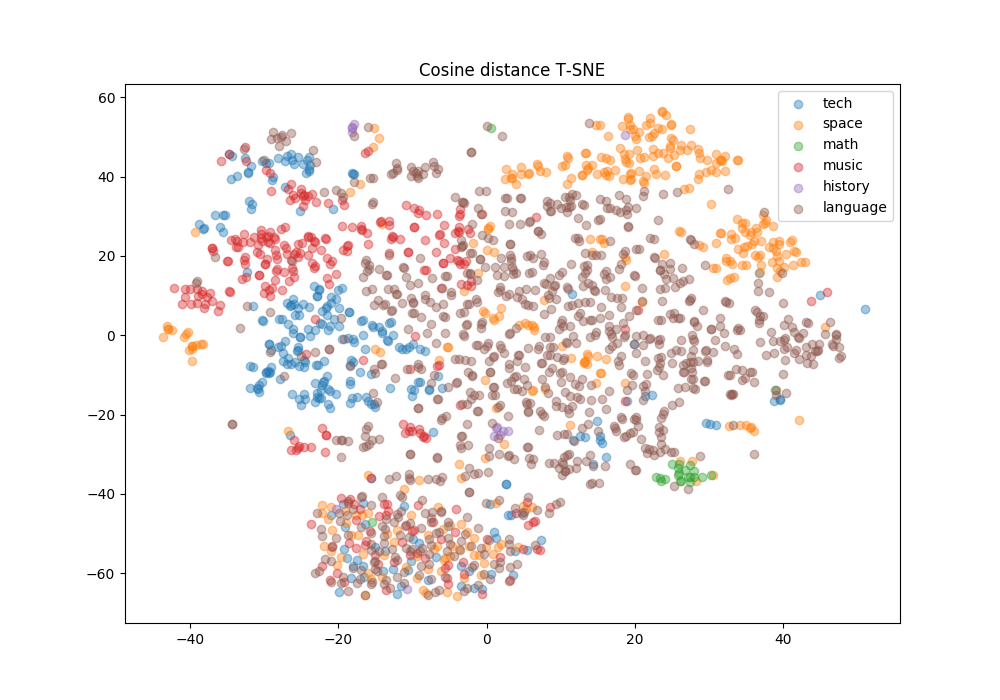

tech      --> 270
space     --> 352
math      --> 23
music     --> 287
history   --> 13
language  --> 900


In [13]:
cosine_dist  = cosine_distances(document_embs)
doc_tsne     = TSNE(n_components = 2, metric = 'precomputed')
doc_emb_tsne = doc_tsne.fit_transform(cosine_dist)

plt.figure(figsize = figsize)
plt.title('Cosine distance T-SNE')
for cat in categories_enc:
    doc_emb_cat = doc_emb_tsne[cat_to_filter[cat]]
    print(f'{cat:9} --> {doc_emb_cat.shape[0]}')
    plt.scatter(doc_emb_cat[:, 0], doc_emb_cat[:, 1], label = cat, alpha = alpha)
_ = plt.legend()

## Euclidean distance Uniform Manifold Approximation and Projection (UMAP)

/home/rodgzilla/anaconda3/envs/nvsm_pytorch/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


<IPython.core.display.Javascript object>


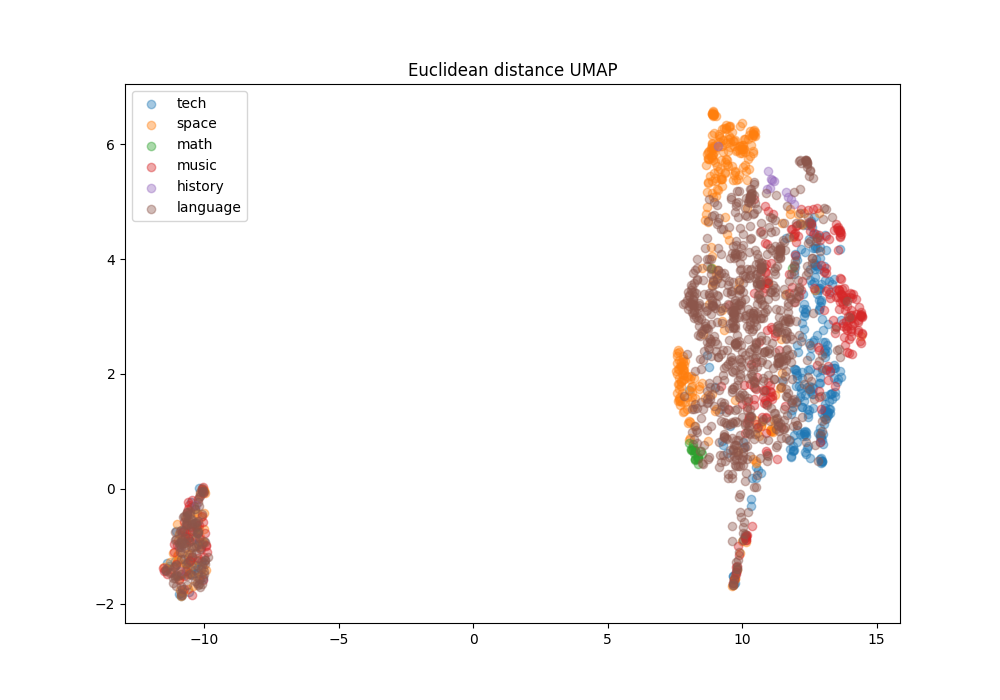

tech      --> 270
space     --> 352
math      --> 23
music     --> 287
history   --> 13
language  --> 900


In [14]:
doc_umap     = UMAP()
doc_emb_umap = doc_umap.fit_transform(document_embs)

plt.figure(figsize = figsize)
plt.title('Euclidean distance UMAP')
for cat in categories_enc:
    doc_emb_cat = doc_emb_umap[cat_to_filter[cat]]
    print(f'{cat:9} --> {doc_emb_cat.shape[0]}')
    plt.scatter(doc_emb_cat[:, 0], doc_emb_cat[:, 1], label = cat, alpha = alpha)
_ = plt.legend()

## Cosine distance Uniform Manifold Approximation and Projection

<IPython.core.display.Javascript object>


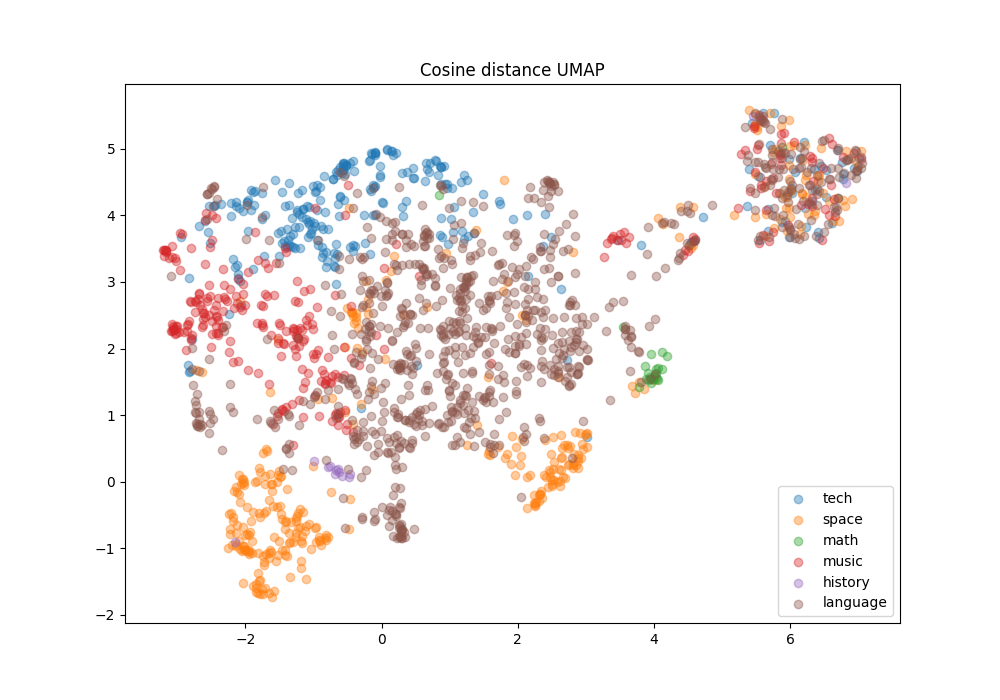

tech      --> 270
space     --> 352
math      --> 23
music     --> 287
history   --> 13
language  --> 900


In [15]:
doc_umap     = UMAP(metric = 'cosine')
doc_emb_umap = doc_umap.fit_transform(document_embs)

plt.figure(figsize = figsize)
plt.title('Cosine distance UMAP')
for cat in categories_enc:
    doc_emb_cat = doc_emb_umap[cat_to_filter[cat]]
    print(f'{cat:9} --> {doc_emb_cat.shape[0]}')
    plt.scatter(doc_emb_cat[:, 0], doc_emb_cat[:, 1], label = cat, alpha = alpha)
_ = plt.legend()

<IPython.core.display.Javascript object>


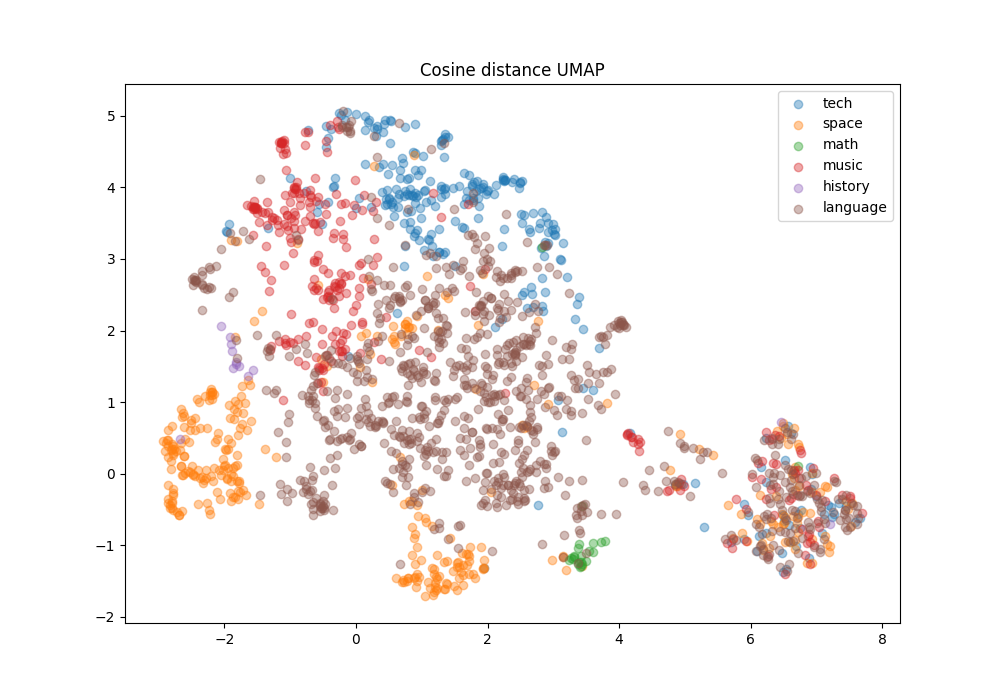

tech      --> 270
space     --> 352
math      --> 23
music     --> 287
history   --> 13
language  --> 900


In [16]:
doc_umap     = UMAP(metric = 'cosine')
doc_emb_umap = doc_umap.fit_transform(document_embs)

fig, ax = plt.subplots(figsize = figsize)
plt.title('Cosine distance UMAP')
for cat in categories_enc:
    doc_emb_cat = doc_emb_umap[cat_to_filter[cat]]
    print(f'{cat:9} --> {doc_emb_cat.shape[0]}')
    points = ax.scatter(doc_emb_cat[:, 0], doc_emb_cat[:, 1], label = cat, alpha = alpha)
#     points = ax.scatter(doc_emb_cat[:, 0], doc_emb_cat[:, 1], alpha = alpha)
    cursor = mplcursors.cursor(points)
    cursor.connect(
        "add", 
        lambda sel, cat = cat: sel.annotation.set_text(
            cat_to_filenames[cat][sel.target.index]
        )
    )
_ = plt.legend()